# Modelos de Regresión

### Importar Librerías

In [1]:
import pandas as pd
from pandas import DataFrame, concat
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from math import sqrt
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### 1. Cargar Datos

In [2]:
file_path = r"..\Modelling\data.csv"
data = pd.read_csv(file_path)
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)
data

,Ventas,Festivo,IsWeekend,DiaSemanaNum,DiaSemana_0,DiaSemana_1,DiaSemana_2,DiaSemana_3,DiaSemana_4,DiaSemana_5,DiaSemana_6,Ventas_Log,Ventas_Loess,Ventas_Log_Loess
Fecha,,,,,,,,,,,,,,
2021-11-02,80413.11,0,0,1,0,1,0,0,0,0,0,11.294945,29692.704031,10.116158
2021-11-03,14889.17,0,0,2,0,0,1,0,0,0,0,9.608457,29674.201652,10.115608
2021-11-04,50003.14,0,0,3,0,0,0,1,0,0,0,10.819861,29656.031451,10.115075
2021-11-05,39607.01,0,0,4,0,0,0,0,1,0,0,10.586787,29638.193546,10.114560
2021-11-06,0.00,0,1,5,0,0,0,0,0,1,0,0.000000,29620.685373,10.114062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-27,305.76,0,1,5,0,0,0,0,0,1,0,5.726066,15205.174613,9.351941
2024-07-28,114.40,0,1,6,0,0,0,0,0,0,1,4.748404,15183.946452,9.350883
2024-07-29,14466.95,0,0,0,1,0,0,0,0,0,0,9.579691,15162.718291,9.349824


In [3]:
test_days = 101 # Coincide con el train-test split del Análisis exploratorio

### 2. Regresión Lineal Múltiple

#### 2.1. Datos sin Transformar

Se elimina DiaSemana_0 para evitar colinealidad.

In [4]:
X = ['Festivo', 'IsWeekend','DiaSemana_1','DiaSemana_2','DiaSemana_3','DiaSemana_4','DiaSemana_5','DiaSemana_6','Ventas_Loess']
y = 'Ventas'

In [5]:
X_train = data[X][:-test_days]
y_train = data[y][:-test_days]

X_test = data[X][-test_days:]
y_test = data[y][-test_days:]

In [6]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model = sm.OLS(y_train,X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     80.31
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          8.71e-100
Time:                        22:19:00   Log-Likelihood:                -10270.
No. Observations:                 902   AIC:                         2.056e+04
Df Residuals:                     893   BIC:                         2.060e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.205e+04   3502.560      3.440      0.001    5175.782    1.89e+04
Festivo      -2.293e+04   5086.357     -4.509      0.000   -3.29e+04   -1.29e+04
IsWeekend    -2.251e+04   1561.849    -14.412      0.000   -2.56e+04   -1.94e+04
DiaSemana_1   1804.2934   2713.781      0.665      0.506   -3521.838    7130.425
DiaSemana_2   2040.6366   2713.786      0.752      0.452   -3285.505    7366.778
DiaSemana_3   3130.8165   2713.792      1.154      0.249   -2195.338    8456.971
DiaSemana_4   5608.7520   2707.150      2.072      0.039     295.635    1.09e+04
DiaSemana_5  -9410.0102   1545.056     -6.090      0.000   -1.24e+04   -6377.645
DiaSemana_6   -1.31e+04   1545.062     -8.479      0.000   -1.61e+04   -1.01e+04
Ventas_Loess     0.9551      0.108      8.841      0.000       0.743       1.167
==============================================================================
Omnibus:                       85.662   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.300
Skew:                           0.794   Prob(JB):                     1.84e-24
Kurtosis:                       3.621   Cond. No.                     1.50e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Con base en el valor-p, se eliminan las variables DiaSemana_3","DiaSemana_2" y "DiaSemana_1". Se reentrena el modelo:

In [7]:
X = ['Festivo', 'IsWeekend','DiaSemana_4', 'DiaSemana_5','DiaSemana_6','Ventas_Loess']
y = 'Ventas'

In [8]:
X_train = data[X][:-test_days]
y_train = data[y][:-test_days]

X_test = data[X][-test_days:]
y_test = data[y][-test_days:]

In [9]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model = sm.OLS(y_train,X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     128.5
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.34e-102
Time:                        22:19:00   Log-Likelihood:                -10271.
No. Observations:                 902   AIC:                         2.055e+04
Df Residuals:                     896   BIC:                         2.058e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.384e+04   3051.339      4.534      0.000    7847.589    1.98e+04
Festivo      -2.406e+04   4964.685     -4.847      0.000   -3.38e+04   -1.43e+04
IsWeekend    -2.368e+04   1087.905    -21.762      0.000   -2.58e+04   -2.15e+04
DiaSemana_4   3843.8517   2107.845      1.824      0.069    -293.036    7980.739
DiaSemana_5  -9992.4746   1438.749     -6.945      0.000   -1.28e+04   -7168.763
DiaSemana_6  -1.368e+04   1438.753     -9.510      0.000   -1.65e+04   -1.09e+04
Ventas_Loess     0.9546      0.108      8.845      0.000       0.743       1.166
==============================================================================
Omnibus:                       85.498   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.006
Skew:                           0.794   Prob(JB):                     2.14e-24
Kurtosis:                       3.617   Cond. No.                     1.70e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
X = ['Festivo', 'IsWeekend', 'DiaSemana_5','DiaSemana_6','Ventas_Loess']
y = 'Ventas'

In [11]:
X_train = data[X][:-test_days]
y_train = data[y][:-test_days]

X_test = data[X][-test_days:]
y_test = data[y][-test_days:]

In [12]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model = sm.OLS(y_train,X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          5.18e-103
Time:                        22:19:00   Log-Likelihood:                -10272.
No. Observations:                 902   AIC:                         2.055e+04
Df Residuals:                     897   BIC:                         2.058e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.463e+04   3024.325      4.836      0.000    8690.845    2.06e+04
Festivo      -2.439e+04   4967.777     -4.910      0.000   -3.41e+04   -1.46e+04
IsWeekend    -2.419e+04   1052.317    -22.985      0.000   -2.63e+04   -2.21e+04
DiaSemana_5  -1.025e+04   1433.722     -7.148      0.000   -1.31e+04   -7434.955
DiaSemana_6  -1.394e+04   1433.725     -9.722      0.000   -1.68e+04   -1.11e+04
Ventas_Loess     0.9541      0.108      8.829      0.000       0.742       1.166
==============================================================================
Omnibus:                       87.033   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.153
Skew:                           0.807   Prob(JB):                     7.30e-25
Kurtosis:                       3.594   Cond. No.                     1.51e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
y_pred_train = model.predict(X_train_const)
y_pred_train = y_pred_train.clip(lower=0)  # Clipping para evitar valores negativos

# Predicciones para el conjunto de prueba
y_pred_test = model.predict(X_test_const)
y_pred_test = y_pred_test.clip(lower=0)

In [14]:
# Comparar predicciones ajustadas en train y test con los valores reales
train_vs_actual = pd.DataFrame({
    'Actual': y_train,
    'Forecast': y_pred_train
}).round(2)

# Calcular RMSE, R² y MAE en train
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)
r2_train = round(r2_score(y_train, y_pred_train), 2)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 2)

print(f'Predicciones en train:\n {train_vs_actual}')
print(f'RMSE (train): {rmse_train}')
print(f'R² (train): {r2_train}')
print(f'MAE (train): {mae_train}')

test_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Forecast': y_pred_test
}).round(2)

# Calcular RMSE, R² y MAE en test
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = round(r2_score(y_test, y_pred_test), 2)
mae_test = round(mean_absolute_error(y_test, y_pred_test), 2)

print(f'Predicciones en test: \n{test_vs_actual}')
print(f'RMSE (test): {rmse_test}')
print(f'R² (test): {r2_test}')
print(f'MAE (test): {mae_test}')

Predicciones en train:
               Actual  Forecast
Fecha                         
2021-11-02  80413.11  42956.25
2021-11-03  14889.17  42938.59
2021-11-04  50003.14  42921.26
2021-11-05  39607.01  42904.24
2021-11-06      0.00   8451.04
...              ...       ...
2024-04-17  12783.88  27092.25
2024-04-18     74.88  27029.99
2024-04-19  12122.84  26966.76
2024-04-20      0.00      0.00
2024-04-21      0.00      0.00

[902 rows x 2 columns]
RMSE (train): 21230.33
R² (train): 0.42
MAE (train): 15806.68
Predicciones en test: 
              Actual  Forecast
Fecha                         
2024-04-22   1306.55  31078.05
2024-04-23   2806.47  31057.80
2024-04-24  32148.73  31037.54
2024-04-25  64399.20  31017.29
2024-04-26  10158.35  30997.04
...              ...       ...
2024-07-27    305.76      0.00
2024-07-28    114.40      0.00
2024-07-29  14466.95  29093.18
2024-07-30  29984.35  29072.93
2024-07-31  15335.34  29052.67

[101 rows x 2 columns]
RMSE (test): 22236.82
R² (test): 0.27

In [15]:
# Almacenar la información del modelo
model_info = {
    'version': 'Regresión OLS',
    'model_name': model.__class__.__name__,
    'rmse_train': rmse_train,
    'mae_train': mae_train,
    'r2_train': r2_train,
    'rmse_test': rmse_test,
    'mae_test': mae_test,
    'r2_test': r2_test,
}

In [16]:
df_models_info = pd.DataFrame([model_info])
df_models_info

,version,model_name,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Regresión OLS,RegressionResultsWrapper,21230.33,15806.68,0.42,22236.82,14988.69,0.27


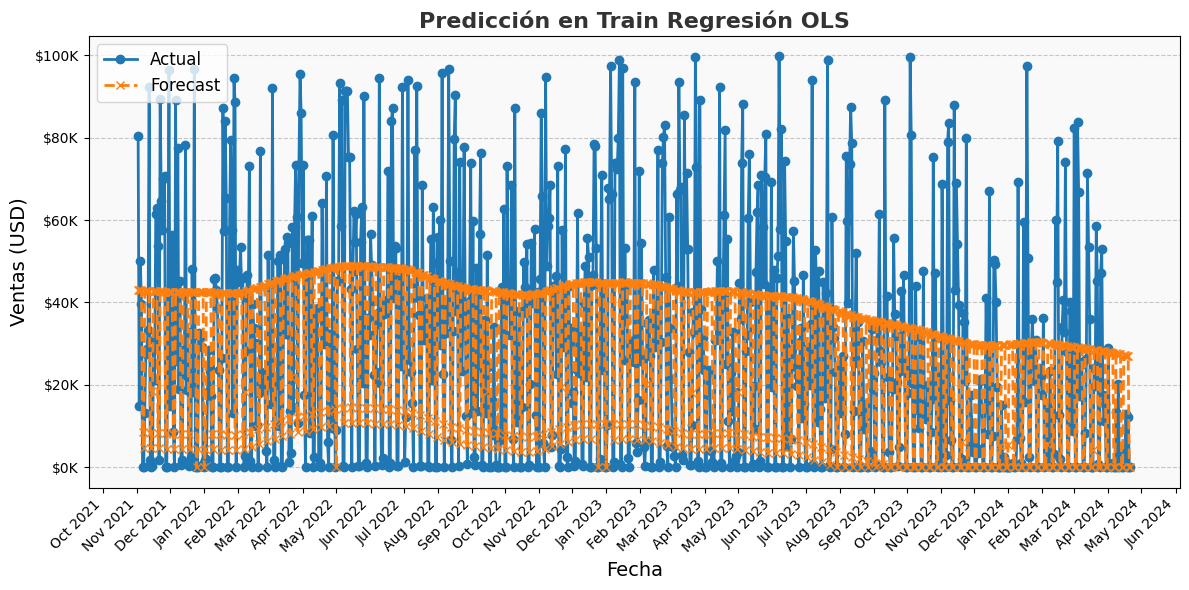

In [17]:
plt.figure(figsize=(12, 6))

# Graficar los valores reales y las predicciones en el conjunto de entrenamiento
plt.plot(train_vs_actual.index, train_vs_actual['Actual'], 
         label='Actual', marker='o', color='#1f77b4', linewidth=2, linestyle='-')

plt.plot(train_vs_actual.index, train_vs_actual['Forecast'], 
         label='Forecast', marker='x', color='#ff7f0e', linewidth=2, linestyle='--')

plt.title('Predicción en Train Regresión OLS', 
          fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Ventas (USD)', fontsize=14)

# Formatear el eje x para mostrar solo los meses y años
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right', fontsize=10)

# Formatear el eje y para mostrar en miles
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-3))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_tick_params(labelsize=10)

# Configuraciones de formato
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

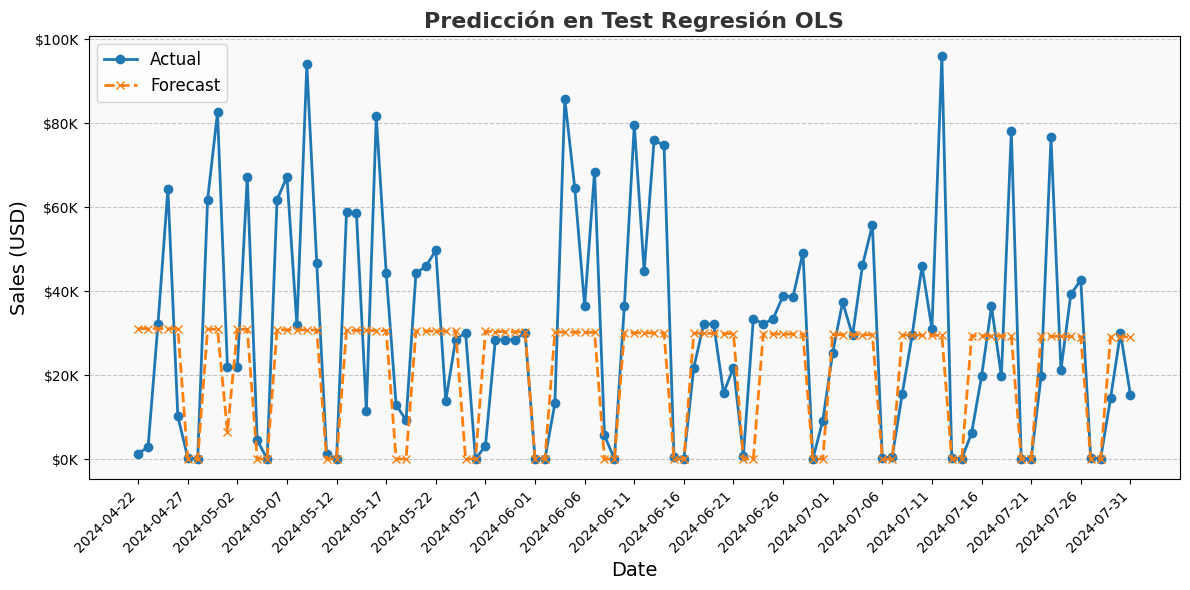

In [18]:
# Graficar los valores reales vs predicciones ajustadas
plt.figure(figsize=(12, 6))
plt.plot(test_vs_actual.index, test_vs_actual['Actual'], 
         label='Actual', marker='o', color='#1f77b4', linewidth=2, linestyle='-')
plt.plot(test_vs_actual.index, test_vs_actual['Forecast'], 
         label='Forecast', marker='x', color='#ff7f0e', linewidth=2, linestyle='--')
plt.title('Predicción en Test Regresión OLS', 
          fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (USD)', fontsize=14)
plt.xticks(test_vs_actual.index[::5], rotation=45, ha='right', fontsize=10)
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-3))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_tick_params(labelsize=10)
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
def plot_predictions(y_pred_train, y_pred_test, data, model_info, test_days):
    """
    Graficar predicciones y valores reales con una línea divisoria para separar train y test.

    Parameters:
    - y_pred_train: Predicciones del conjunto de entrenamiento.
    - y_pred_test: Predicciones del conjunto de prueba.
    - data: DataFrame con los valores reales ('Ventas').
    - model_info: Diccionario con información del modelo, debe incluir la clave 'version'.
    - test_days: Número de días en el conjunto de prueba (default: 101).
    """
    # Generar df para almacenar predicciones y usar los últimos 200 días
    predictions = pd.concat([y_pred_train, y_pred_test], axis=0).to_frame(name='Predicted')
    predictions['Actual'] = data.loc[predictions.index, 'Ventas']
    test_start_index = predictions.index[-test_days]

    predictions_last_200 = predictions.tail(200)
    plt.figure(figsize=(12, 6))
    # Graficar train y test
    plt.plot(predictions_last_200.loc[:test_start_index].index, predictions_last_200.loc[:test_start_index, 'Actual'],
             label='Actual - Train', marker='o', color='#1f77b4', linewidth=2, linestyle='-')
    plt.plot(predictions_last_200.loc[:test_start_index].index, predictions_last_200.loc[:test_start_index, 'Predicted'],
             label='Forecast - Train', marker='x', color='#ff7f0e', linewidth=2, linestyle='--')
    plt.plot(predictions_last_200.loc[test_start_index:].index, predictions_last_200.loc[test_start_index:, 'Actual'],
             label='Actual - Test', marker='o', color='#2ca02c', linewidth=2, linestyle='-')
    plt.plot(predictions_last_200.loc[test_start_index:].index, predictions_last_200.loc[test_start_index:, 'Predicted'],
             label='Forecast - Test', marker='x', color='#d62728', linewidth=2, linestyle='--')

    # Configurar formato
    plt.axvline(test_start_index, color='gray', linestyle='--', linewidth=1.5)
    plt.title(f"Predicciones {model_info['version']} (Últimos 200 días)", fontsize=16, fontweight='bold', color='#333')
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Ventas (USD)', fontsize=14)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    plt.xticks(rotation=45, ha='right', fontsize=10)
    formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-3))
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('#f9f9f9')
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

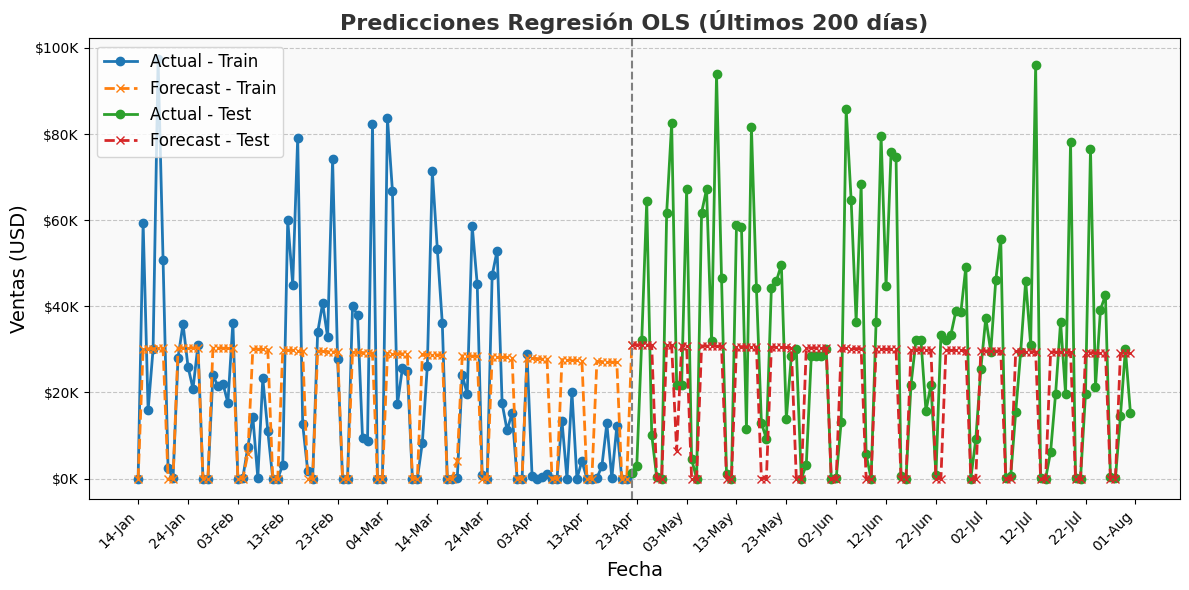

In [20]:
# Gráfica comparativa Regresión OLS
plot_predictions(y_pred_train, y_pred_test, data, model_info,test_days=test_days)

#### 2.2. Datos transformados

In [21]:
X = ['Festivo', 'IsWeekend','DiaSemana_0','DiaSemana_1','DiaSemana_2','DiaSemana_3','DiaSemana_4','DiaSemana_5','DiaSemana_6','Ventas_Log_Loess']
y = 'Ventas_Log'

In [22]:
X_train = data[X][:-test_days]
y_train = data[y][:-test_days]

X_test = data[X][-test_days:]
y_test = data[y][-test_days:]

In [23]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model_log = sm.OLS(y_train,X_train_const).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ventas_Log   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     226.7
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          4.39e-209
Time:                        22:19:10   Log-Likelihood:                -2019.5
No. Observations:                 902   AIC:                             4057.
Df Residuals:                     893   BIC:                             4100.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.9990      1.778     -6.187      0.000     -14.488      -7.510
Festivo             -2.6923      0.542     -4.967      0.000      -3.756      -1.629
IsWeekend           -5.2697      0.230    -22.955      0.000      -5.720      -4.819
DiaSemana_0         -1.2891      0.366     -3.522      0.000      -2.007      -0.571
DiaSemana_1         -1.1173      0.363     -3.080      0.002      -1.829      -0.405
DiaSemana_2         -1.2029      0.362     -3.319      0.001      -1.914      -0.492
DiaSemana_3         -1.0766      0.362     -2.973      0.003      -1.787      -0.366
DiaSemana_4         -1.0434      0.362     -2.884      0.004      -1.754      -0.333
DiaSemana_5         -1.6980      0.183     -9.292      0.000      -2.057      -1.339
DiaSemana_6         -3.5717      0.183    -19.566      0.000      -3.930      -3.213
Ventas_Log_Loess     2.2435      0.210     10.663      0.000       1.831       2.656
==============================================================================
Omnibus:                       98.198   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.430
Skew:                          -0.406   Prob(JB):                     3.42e-94
Kurtosis:                       6.285   Cond. No.                     5.58e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
y_train = np.exp(y_train) - 1
y_test = np.exp(y_test) - 1 

# Predicciones y métricas en train
y_pred_train = model_log.predict(X_train_const)
y_pred_train = np.exp(y_pred_train) - 1
y_pred_train =y_pred_train.clip(lower = 0)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

# Predicciones y métricas en test
y_pred_test = model_log.predict(X_test_const)
y_pred_test = np.exp(y_pred_test) - 1
y_pred_test =y_pred_test.clip(lower = 0)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

In [25]:
# Comparar predicciones ajustadas en train y test con los valores reales
train_vs_actual = pd.DataFrame({
    'Actual': y_train,
    'Forecast': y_pred_train
}).round(2)

# Calcular RMSE, R² y MAE en train
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)
r2_train = round(r2_score(y_train, y_pred_train), 2)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 2)

print(f'Predicciones en train:\n {train_vs_actual}')
print(f'RMSE (train): {rmse_train}')
print(f'R² (train): {r2_train}')
print(f'MAE (train): {mae_train}')

test_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Forecast': y_pred_test
}).round(2)

# Calcular RMSE, R² y MAE en test
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = round(r2_score(y_test, y_pred_test), 2)
mae_test = round(mean_absolute_error(y_test, y_pred_test), 2)

print(f'Predicciones en test: \n{test_vs_actual}')
print(f'RMSE (test): {rmse_test}')
print(f'R² (test): {r2_test}')
print(f'MAE (test): {mae_test}')

Predicciones en train:
               Actual  Forecast
Fecha                         
2021-11-02  80413.11  39302.07
2021-11-03  14889.17  36032.64
2021-11-04  50003.14  40837.82
2021-11-05  39607.01  42164.73
2021-11-06      0.00    111.61
...              ...       ...
2024-04-17  12783.88   1598.06
2024-04-18     74.88   1769.32
2024-04-19  12122.84   1783.96
2024-04-20      0.00      3.65
2024-04-21      0.00      0.00

[902 rows x 2 columns]
RMSE (train): 23275.31
R² (train): 0.31
MAE (train): 15265.18
Predicciones en test: 
              Actual  Forecast
Fecha                         
2024-04-22   1306.55   7485.09
2024-04-23   2806.47   8866.89
2024-04-24  32148.73   8119.94
2024-04-25  64399.20   9192.03
2024-04-26  10158.35   9479.16
...              ...       ...
2024-07-27    305.76     19.37
2024-07-28    114.40      2.12
2024-07-29  14466.95   5930.54
2024-07-30  29984.35   7025.39
2024-07-31  15335.34   6433.55

[101 rows x 2 columns]
RMSE (test): 34403.44
R² (test): -0.7

In [26]:
# Almacenar la información del modelo
model_info = {
    'version': 'Regresión OLS_Log',
    'model_name': model_log.__class__.__name__,
    'rmse_train': rmse_train,
    'mae_train': mae_train,
    'r2_train': r2_train,
    'rmse_test': rmse_test,
    'mae_test': mae_test,
    'r2_test': r2_test,
}

In [27]:
df_models_info = pd.concat([df_models_info, pd.DataFrame([model_info])], ignore_index=True)
df_models_info

,version,model_name,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Regresión OLS,RegressionResultsWrapper,21230.33,15806.68,0.42,22236.82,14988.69,0.27
1,Regresión OLS_Log,RegressionResultsWrapper,23275.31,15265.18,0.31,34403.44,25096.46,-0.74


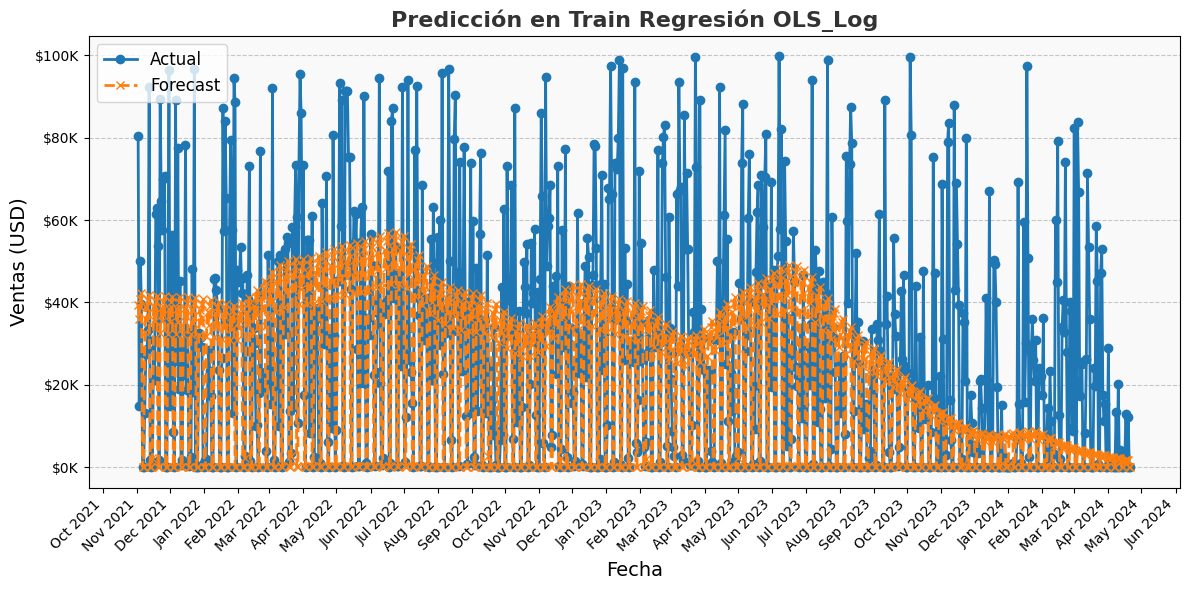

In [28]:
plt.figure(figsize=(12, 6))

# Graficar los valores reales y las predicciones en el conjunto de entrenamiento
plt.plot(train_vs_actual.index, train_vs_actual['Actual'], 
         label='Actual', marker='o', color='#1f77b4', linewidth=2, linestyle='-')

plt.plot(train_vs_actual.index, train_vs_actual['Forecast'], 
         label='Forecast', marker='x', color='#ff7f0e', linewidth=2, linestyle='--')

plt.title('Predicción en Train Regresión OLS_Log', 
          fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Ventas (USD)', fontsize=14)

# Formatear el eje x para mostrar solo los meses y años
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right', fontsize=10)

# Formatear el eje y para mostrar en miles
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-3))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_tick_params(labelsize=10)

# Configuraciones de formato
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

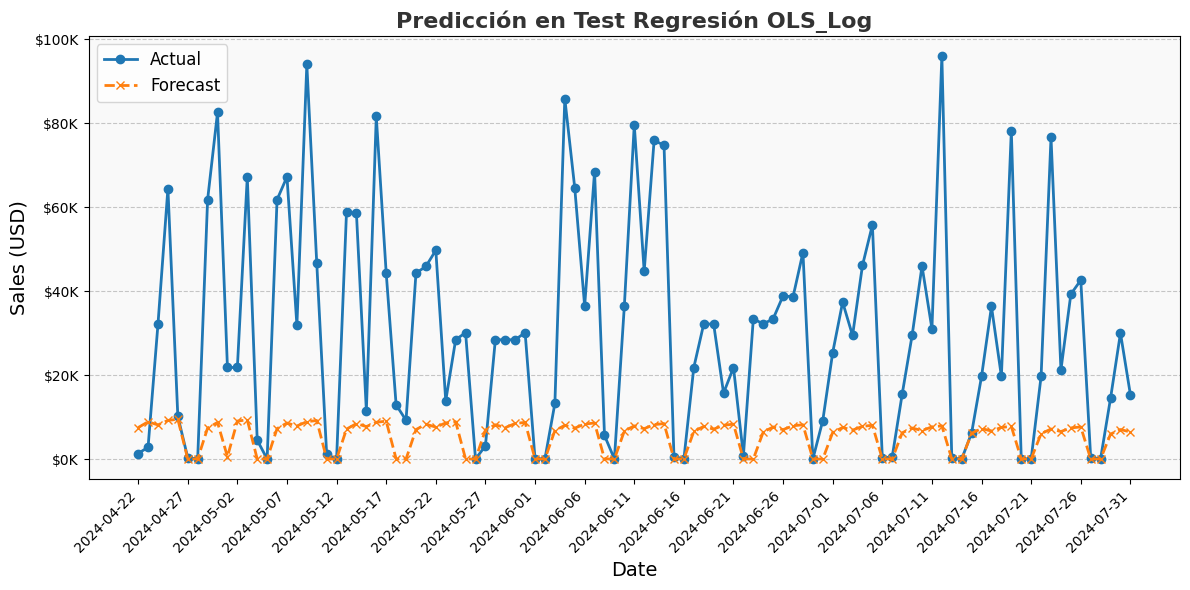

In [29]:
# Graficar los valores reales vs predicciones ajustadas
plt.figure(figsize=(12, 6))
plt.plot(test_vs_actual.index, test_vs_actual['Actual'], 
         label='Actual', marker='o', color='#1f77b4', linewidth=2, linestyle='-')
plt.plot(test_vs_actual.index, test_vs_actual['Forecast'], 
         label='Forecast', marker='x', color='#ff7f0e', linewidth=2, linestyle='--')
plt.title('Predicción en Test Regresión OLS_Log', 
          fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (USD)', fontsize=14)
plt.xticks(test_vs_actual.index[::5], rotation=45, ha='right', fontsize=10)
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-3))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_tick_params(labelsize=10)
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

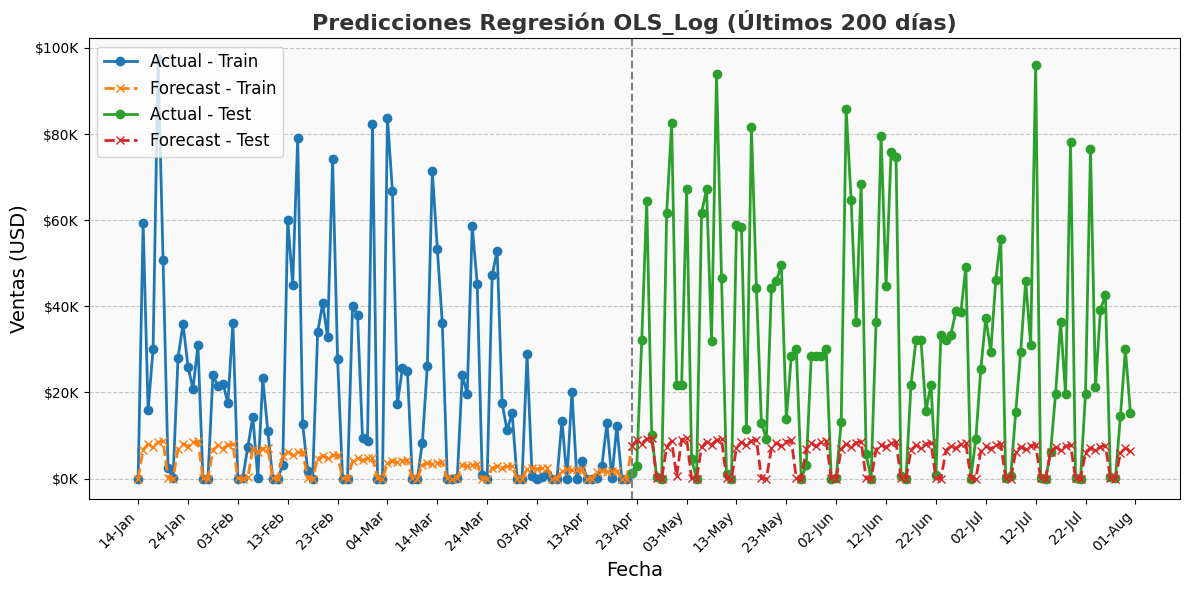

In [30]:
# Gráfica comparativa Regresión OLS_log
plot_predictions(y_pred_train, y_pred_test, data, model_info,test_days=test_days)

### 3. Robust Linear Model

#### 3.1. Datos sin Transformar

In [31]:
X = ['Festivo', 'IsWeekend','DiaSemana_0','DiaSemana_1','DiaSemana_2','DiaSemana_3','DiaSemana_4','DiaSemana_5','DiaSemana_6','Ventas_Loess']
y = 'Ventas'

In [32]:
X_train = data[X][:-test_days]
y_train = data[y][:-test_days]

X_test = data[X][-test_days:]
y_test = data[y][-test_days:]

In [33]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test) 
# Ajustar el modelo RLM
rlm_model = sm.RLM(y_train, X_train_const, M=sm.robust.norms.HuberT())  # Usando la función de pérdida Huber
rlm_results = rlm_model.fit()

In [34]:
# Predicciones y métricas en train
y_pred_train = rlm_results.predict(X_train_const).clip(lower=0)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

# Predicciones y métricas en train
y_pred_test = rlm_results.predict(X_test_const).clip(lower=0)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

In [35]:
# Comparar predicciones ajustadas en train y test con los valores reales
train_vs_actual = pd.DataFrame({
    'Actual': y_train,
    'Forecast': y_pred_train
}).round(2)

# Calcular RMSE, R² y MAE en train
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)
r2_train = round(r2_score(y_train, y_pred_train), 2)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 2)

print(f'Predicciones en train:\n {train_vs_actual}')
print(f'RMSE (train): {rmse_train}')
print(f'R² (train): {r2_train}')
print(f'MAE (train): {mae_train}')

test_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Forecast': y_pred_test
}).round(2)

# Calcular RMSE, R² y MAE en test
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = round(r2_score(y_test, y_pred_test), 2)
mae_test = round(mean_absolute_error(y_test, y_pred_test), 2)

print(f'Predicciones en test: \n{test_vs_actual}')
print(f'RMSE (test): {rmse_test}')
print(f'R² (test): {r2_test}')
print(f'MAE (test): {mae_test}')

Predicciones en train:
               Actual  Forecast
Fecha                         
2021-11-02  80413.11  40175.19
2021-11-03  14889.17  38631.74
2021-11-04  50003.14  39422.27
2021-11-05  39607.01  43370.79
2021-11-06      0.00   6438.97
...              ...       ...
2024-04-17  12783.88  23400.17
2024-04-18     74.88  24147.52
2024-04-19  12122.84  28051.62
2024-04-20      0.00      0.00
2024-04-21      0.00      0.00

[902 rows x 2 columns]
RMSE (train): 21373.45
R² (train): 0.41
MAE (train): 15363.0
Predicciones en test: 
              Actual  Forecast
Fecha                         
2024-04-22   1306.55  24851.82
2024-04-23   2806.47  28738.35
2024-04-24  32148.73  27192.40
2024-04-25  64399.20  27980.13
2024-04-26  10158.35  31925.54
...              ...       ...
2024-07-27    305.76      0.00
2024-07-28    114.40      0.00
2024-07-29  14466.95  22943.96
2024-07-30  29984.35  26830.48
2024-07-31  15335.34  25284.53

[101 rows x 2 columns]
RMSE (test): 22839.88
R² (test): 0.23


In [36]:
# Almacenar la información del modelo
model_info = {
    'version': 'RLM',
    'model_name': rlm_model.__class__.__name__,
    'rmse_train': rmse_train,
    'mae_train': mae_train,
    'r2_train': r2_train,
    'rmse_test': rmse_test,
    'mae_test': mae_test,
    'r2_test': r2_test,
}

In [37]:
df_models_info = pd.concat([df_models_info, pd.DataFrame([model_info])], ignore_index=True)
df_models_info

,version,model_name,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Regresión OLS,RegressionResultsWrapper,21230.33,15806.68,0.42,22236.82,14988.69,0.27
1,Regresión OLS_Log,RegressionResultsWrapper,23275.31,15265.18,0.31,34403.44,25096.46,-0.74
2,RLM,RLM,21373.45,15363.00,0.41,22839.88,15387.59,0.23


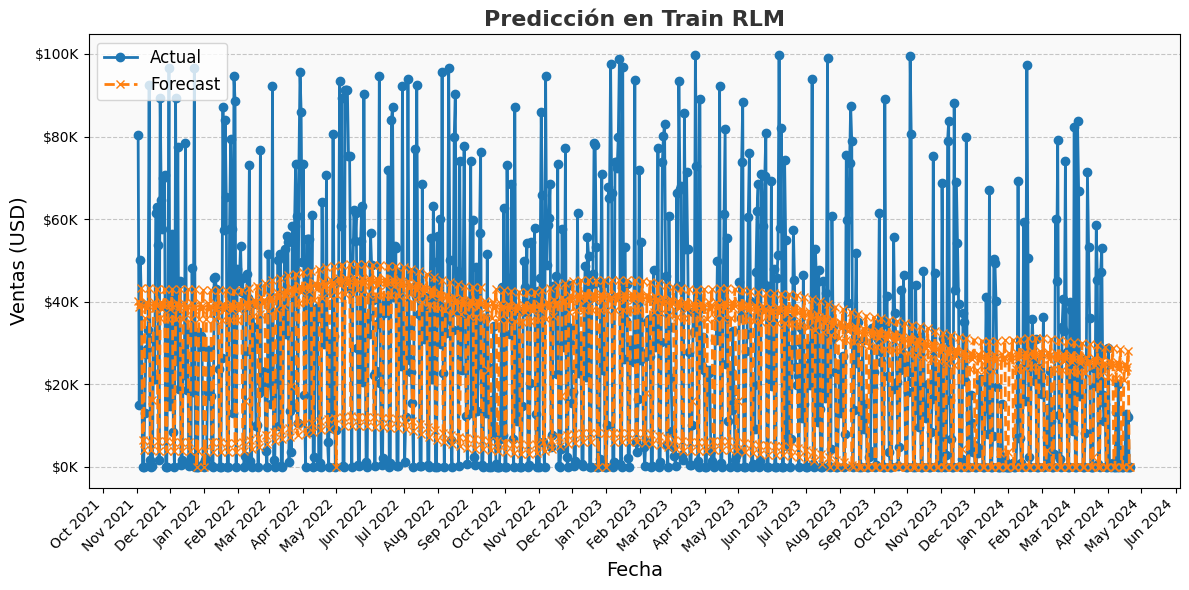

In [38]:
plt.figure(figsize=(12, 6))

# Graficar los valores reales y las predicciones en el conjunto de entrenamiento
plt.plot(train_vs_actual.index, train_vs_actual['Actual'], 
         label='Actual', marker='o', color='#1f77b4', linewidth=2, linestyle='-')

plt.plot(train_vs_actual.index, train_vs_actual['Forecast'], 
         label='Forecast', marker='x', color='#ff7f0e', linewidth=2, linestyle='--')

plt.title('Predicción en Train RLM', 
          fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Ventas (USD)', fontsize=14)

# Formatear el eje x para mostrar solo los meses y años
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right', fontsize=10)

# Formatear el eje y para mostrar en miles
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-3))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_tick_params(labelsize=10)

# Configuraciones de formato
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

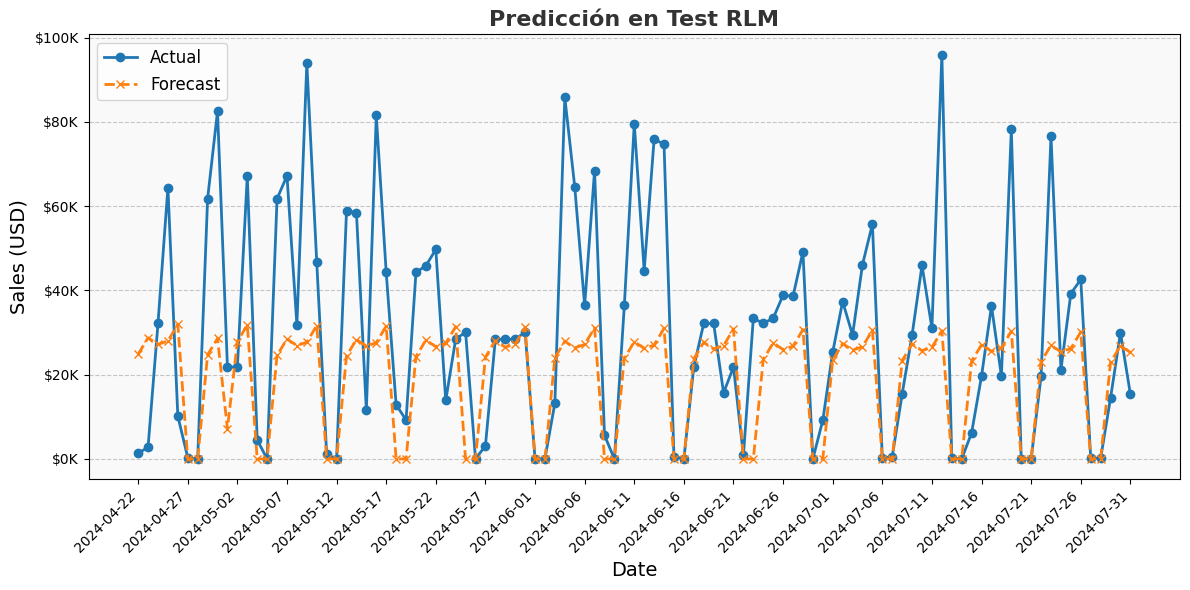

In [39]:
# Graficar los valores reales vs predicciones ajustadas
plt.figure(figsize=(12, 6))
plt.plot(test_vs_actual.index, test_vs_actual['Actual'], 
         label='Actual', marker='o', color='#1f77b4', linewidth=2, linestyle='-')
plt.plot(test_vs_actual.index, test_vs_actual['Forecast'], 
         label='Forecast', marker='x', color='#ff7f0e', linewidth=2, linestyle='--')
plt.title('Predicción en Test RLM', 
          fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (USD)', fontsize=14)
plt.xticks(test_vs_actual.index[::5], rotation=45, ha='right', fontsize=10)
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-3))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_tick_params(labelsize=10)
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

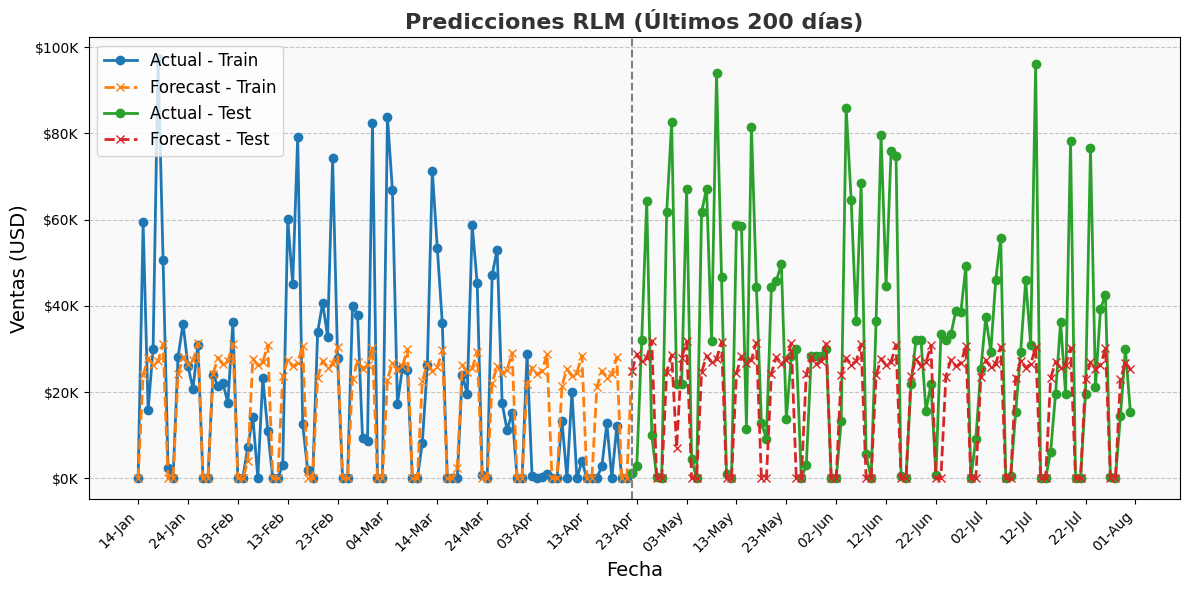

In [40]:
# Gráfica comparativa Regresión RLM
plot_predictions(y_pred_train, y_pred_test, data, model_info,test_days=test_days)

#### 3.2. Datos transformados

In [41]:
X = ['Festivo', 'IsWeekend','DiaSemana_0','DiaSemana_1','DiaSemana_2','DiaSemana_3','DiaSemana_4','DiaSemana_5','DiaSemana_6','Ventas_Log_Loess']
y = 'Ventas_Log'

In [42]:
X_train = data[X][:-test_days]
y_train = data[y][:-test_days]

X_test = data[X][-test_days:]
y_test = data[y][-test_days:]

In [43]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
# Ajustar el modelo RLM
rlm_model = sm.RLM(y_train, X_train_const, M=sm.robust.norms.HuberT())  # Usando la función de pérdida Huber
rlm_results = rlm_model.fit()

In [44]:
y_train = np.exp(y_train) - 1
y_test = np.exp(y_test) - 1 

# Predicciones y métricas en train
y_pred_train = np.exp(rlm_results.predict(X_train_const))-1
y_pred_train =y_pred_train.clip(lower = 0)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

# Predicciones y métricas en test
y_pred_test = np.exp(rlm_results.predict(X_test_const))-1
y_pred_test =y_pred_test.clip(lower = 0)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

In [45]:
# Comparar predicciones ajustadas en train y test con los valores reales
train_vs_actual = pd.DataFrame({
    'Actual': y_train,
    'Forecast': y_pred_train
}).round(2)

# Calcular RMSE, R² y MAE en train
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2)
r2_train = round(r2_score(y_train, y_pred_train), 2)
mae_train = round(mean_absolute_error(y_train, y_pred_train), 2)

print(f'Predicciones en train:\n {train_vs_actual}')
print(f'RMSE (train): {rmse_train}')
print(f'R² (train): {r2_train}')
print(f'MAE (train): {mae_train}')

test_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Forecast': y_pred_test
}).round(2)

# Calcular RMSE, R² y MAE en test
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2)
r2_test = round(r2_score(y_test, y_pred_test), 2)
mae_test = round(mean_absolute_error(y_test, y_pred_test), 2)

print(f'Predicciones en test: \n{test_vs_actual}')
print(f'RMSE (test): {rmse_test}')
print(f'R² (test): {r2_test}')
print(f'MAE (test): {mae_test}')

Predicciones en train:
               Actual  Forecast
Fecha                         
2021-11-02  80413.11  40703.21
2021-11-03  14889.17  40021.26
2021-11-04  50003.14  38491.25
2021-11-05  39607.01  43239.51
2021-11-06      0.00    148.83
...              ...       ...
2024-04-17  12783.88   6840.57
2024-04-18     74.88   6492.16
2024-04-19  12122.84   7195.61
2024-04-20      0.00     23.60
2024-04-21      0.00      0.00

[902 rows x 2 columns]
RMSE (train): 22141.72
R² (train): 0.37
MAE (train): 14721.3
Predicciones en test: 
              Actual  Forecast
Fecha                         
2024-04-22   1306.55  15265.85
2024-04-23   2806.47  17496.40
2024-04-24  32148.73  17192.13
2024-04-25  64399.20  16523.79
2024-04-26  10158.35  18549.39
...              ...       ...
2024-07-27    305.76     55.82
2024-07-28    114.40      0.23
2024-07-29  14466.95  13378.08
2024-07-30  29984.35  15332.83
2024-07-31  15335.34  15066.17

[101 rows x 2 columns]
RMSE (test): 29015.48
R² (test): -0.24

In [46]:
# Almacenar la información del modelo
model_info = {
    'version': 'RLM_Log',
    'model_name': rlm_model.__class__.__name__,
    'rmse_train': rmse_train,
    'mae_train': mae_train,
    'r2_train': r2_train,
    'rmse_test': rmse_test,
    'mae_test': mae_test,
    'r2_test': r2_test,
}

In [47]:
df_models_info = pd.concat([df_models_info, pd.DataFrame([model_info])], ignore_index=True)
df_models_info

,version,model_name,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Regresión OLS,RegressionResultsWrapper,21230.33,15806.68,0.42,22236.82,14988.69,0.27
1,Regresión OLS_Log,RegressionResultsWrapper,23275.31,15265.18,0.31,34403.44,25096.46,-0.74
2,RLM,RLM,21373.45,15363.00,0.41,22839.88,15387.59,0.23
3,RLM_Log,RLM,22141.72,14721.30,0.37,29015.48,20172.02,-0.24


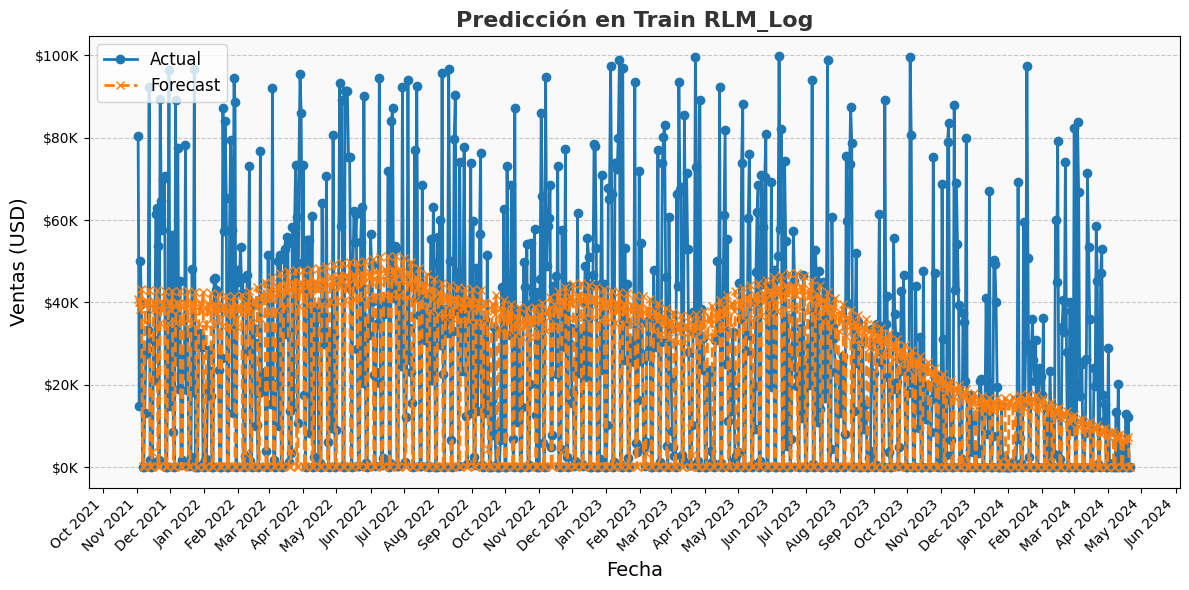

In [48]:
plt.figure(figsize=(12, 6))

# Graficar los valores reales y las predicciones en el conjunto de entrenamiento
plt.plot(train_vs_actual.index, train_vs_actual['Actual'], 
         label='Actual', marker='o', color='#1f77b4', linewidth=2, linestyle='-')

plt.plot(train_vs_actual.index, train_vs_actual['Forecast'], 
         label='Forecast', marker='x', color='#ff7f0e', linewidth=2, linestyle='--')

plt.title('Predicción en Train RLM_Log', 
          fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Ventas (USD)', fontsize=14)

# Formatear el eje x para mostrar solo los meses y años
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right', fontsize=10)

# Formatear el eje y para mostrar en miles
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-3))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_tick_params(labelsize=10)

# Configuraciones de formato
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

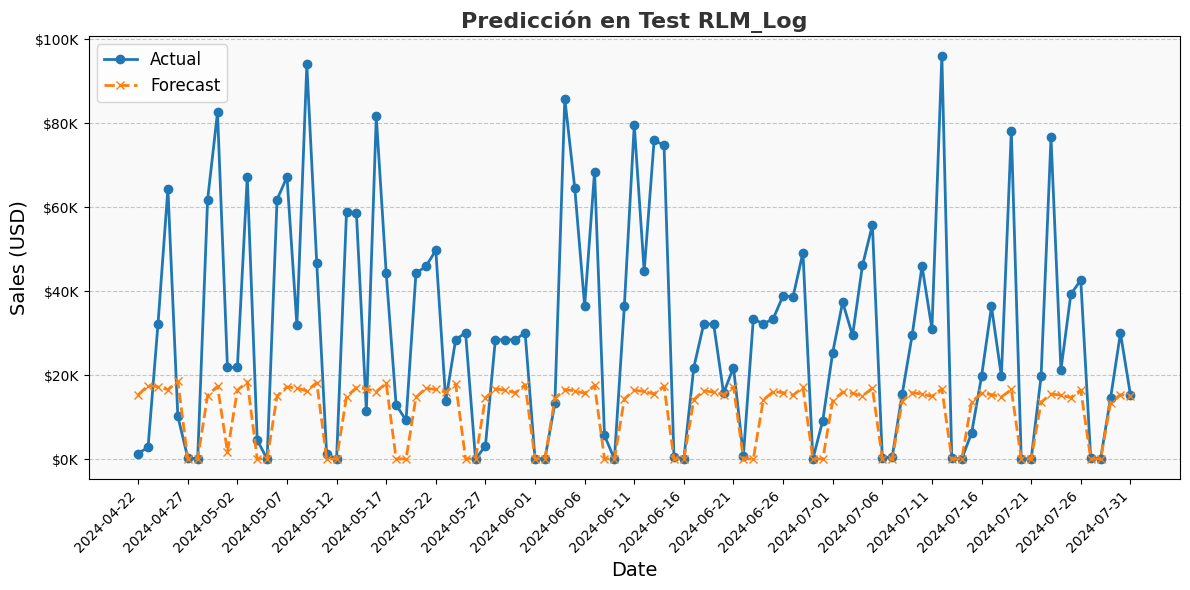

In [49]:
# Graficar los valores reales vs predicciones ajustadas
plt.figure(figsize=(12, 6))
plt.plot(test_vs_actual.index, test_vs_actual['Actual'], 
         label='Actual', marker='o', color='#1f77b4', linewidth=2, linestyle='-')
plt.plot(test_vs_actual.index, test_vs_actual['Forecast'], 
         label='Forecast', marker='x', color='#ff7f0e', linewidth=2, linestyle='--')
plt.title('Predicción en Test RLM_Log', 
          fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (USD)', fontsize=14)
plt.xticks(test_vs_actual.index[::5], rotation=45, ha='right', fontsize=10)
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-3))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_tick_params(labelsize=10)
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

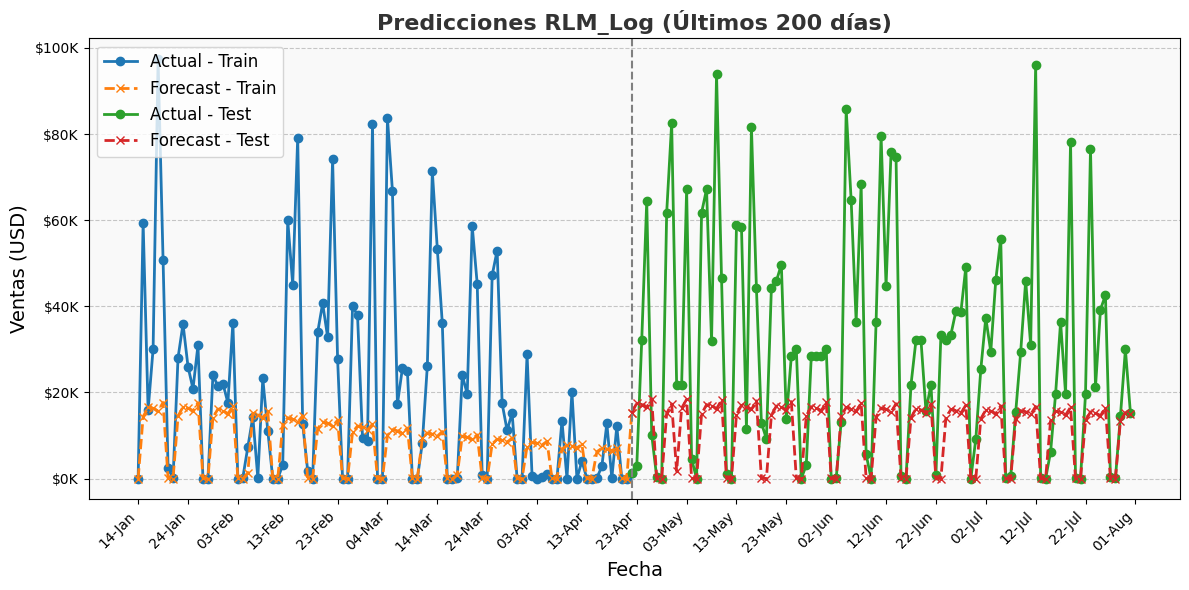

In [50]:
# Gráfica comparativa Regresión RLM_Log
plot_predictions(y_pred_train, y_pred_test, data, model_info,test_days=test_days)

### 4. Exportar Resultados

In [51]:
ruta = r'C:\Users\fsanc\OneDrive - Universidad EAFIT\Documentos\Pipe\OneDrive - Universidad EAFIT\Maestría\Trabajo de Grado\Results\regresiones.csv'
df_models_info.to_csv(ruta, index=False)